In [2]:
!pip3 install tensorflow

     -------------------------------------- 300.9/300.9 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 186.4/186.4 kB 5.7 MB/s eta 0:00:00
     -------------------------------------- 422.

In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load and preprocess your data (replace with your data loading code)
data = pd.read_csv('transfusion.data')
data = data.sample(frac=1,random_state=123).reset_index(drop=True)

In [48]:
#displaying subroutines
#dir(tf.keras.losses)
dir(tf.keras.optimizers)

['Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'Ftrl',
 'Lion',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'experimental',
 'get',
 'legacy',
 'schedules',
 'serialize']

In [14]:
X = np.array(data)[:, 0:-1]
Y = np.array(data)[:, -1]

In [15]:
one_hot_encoder = OneHotEncoder(sparse=False)
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [39]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(Y_train.shape[1], activation='softmax')
])



In [40]:
# Compile the model
model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])

# Train the model
epochs = 100
batch_size = 32
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 9.0947 - accuracy: 0.7718 - val_loss: 6.2803 - val_accuracy: 0.7326
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 4.5005 - accuracy: 0.7718 - val_loss: 3.0746 - val_accuracy: 0.7326
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 2.1111 - accuracy: 0.7718 - val_loss: 1.4526 - val_accuracy: 0.7326
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.9776 - accuracy: 0.7718 - val_loss: 0.8706 - val_accuracy: 0.7326
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.7718 - val_loss: 0.7309 - val_accuracy: 0.7326
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.7718 - val_loss: 0.7176 - val_accuracy: 0.7326
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.7718 - val_loss: 0.7160 - val_accuracy: 0.7326
Epoch 8/100


Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5611 - accuracy: 0.7718 - val_loss: 0.6006 - val_accuracy: 0.7326
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.7718 - val_loss: 0.5853 - val_accuracy: 0.7326
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5554 - accuracy: 0.7718 - val_loss: 0.5873 - val_accuracy: 0.7326
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5682 - accuracy: 0.7718 - val_loss: 0.5903 - val_accuracy: 0.7326
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5574 - accuracy: 0.7718 - val_loss: 0.5663 - val_accuracy: 0.7380
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5482 - accuracy: 0.7718 - val_loss: 0.5889 - val_accuracy: 0.7326
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.7718 - val_loss: 0.5778 - val_accuracy: 0.7326
Epoch 

6/6 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7380
Testing Accuracy: 0.7379679083824158
6/6 [==============================] - 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       137
           1       1.00      0.02      0.04        50

    accuracy                           0.74       187
   macro avg       0.87      0.51      0.44       187
weighted avg       0.81      0.74      0.63       187



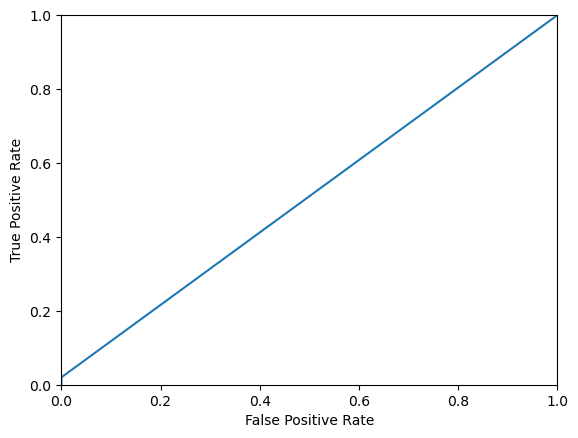

In [41]:
# Evaluate the model
accuracy = model.evaluate(X_test, Y_test)
print("Testing Accuracy: {}".format(accuracy[1]))

# Predict and evaluate
Y_result = model.predict(X_test)
Y_result = np.argmax(Y_result, axis=1)
Y_test = np.argmax(Y_test, axis=1)

classification_rep = classification_report(Y_test, Y_result)
print("Classification Report:\n", classification_rep)

# Calculate fpr and tpr
fpr, tpr, _ = roc_curve(Y_test, Y_result)

# Plot ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

plot_roc_curve(fpr, tpr)

In [42]:
fpr

array([0., 0., 1.])

In [79]:
tpr

array([0.  , 0.02, 1.  ])

In [80]:
_

array([2, 1, 0], dtype=int64)

In [44]:
Y_test

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

# WHEAT-SEEDS

In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load and preprocess your data (replace with your data loading code)
data = pd.read_csv('seeds_dataset.txt',names = [1,2,3,4,5,6,7,8],sep='\s+')
data = data.sample(frac=1,random_state=123).reset_index(drop=True)

In [82]:
#displaying subroutines
dir(tf.keras.losses)
#dir(tf.keras.optimizers)

['BinaryCrossentropy',
 'BinaryFocalCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalFocalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'Reduction',
 'SparseCategoricalCrossentropy',
 'SquaredHinge',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'binary_crossentropy',
 'binary_focal_crossentropy',
 'categorical_crossentropy',
 'categorical_focal_crossentropy',
 'categorical_hinge',
 'cosine_similarity',
 'deserialize',
 'get',
 'hinge',
 'huber',
 'kl_divergence',
 'kld',
 'kullback_leibler_divergence',
 'log_cosh',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'ms

In [83]:
X = np.array(data)[:, 0:-1]
Y = np.array(data)[:, -1]

In [84]:
one_hot_encoder = OneHotEncoder(sparse=False)
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [86]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(Y_train.shape[1], activation='softmax')
])



In [87]:
# Compile the model
model.compile(optimizer='Adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

# Train the model
epochs = 100
batch_size = 32
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/100
5/5 [==============================] - 1s 73ms/step - loss: 1.1802 - accuracy: 0.3121 - val_loss: 1.0404 - val_accuracy: 0.3962
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 1.0675 - accuracy: 0.3885 - val_loss: 1.0781 - val_accuracy: 0.5849
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 1.0910 - accuracy: 0.4459 - val_loss: 1.0983 - val_accuracy: 0.3396
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 1.0941 - accuracy: 0.4268 - val_loss: 1.0871 - val_accuracy: 0.5094
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 1.0721 - accuracy: 0.5414 - val_loss: 1.0414 - val_accuracy: 0.4528
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 1.0606 - accuracy: 0.3376 - val_loss: 1.0328 - val_accuracy: 0.3962
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 1.0661 - accuracy: 0.3248 - val_loss: 1.0316 - val_accuracy: 0.3962
Epoch 8/100
5/5 [===

5/5 [==============================] - 0s 14ms/step - loss: 0.8990 - accuracy: 0.6624 - val_loss: 0.8507 - val_accuracy: 0.6981
Epoch 60/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8948 - accuracy: 0.6433 - val_loss: 0.8497 - val_accuracy: 0.7170
Epoch 61/100
5/5 [==============================] - 0s 15ms/step - loss: 0.8908 - accuracy: 0.6943 - val_loss: 0.8508 - val_accuracy: 0.6981
Epoch 62/100
5/5 [==============================] - 0s 15ms/step - loss: 0.8883 - accuracy: 0.7070 - val_loss: 0.8403 - val_accuracy: 0.7170
Epoch 63/100
5/5 [==============================] - 0s 14ms/step - loss: 0.8927 - accuracy: 0.5796 - val_loss: 0.8314 - val_accuracy: 0.6981
Epoch 64/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8798 - accuracy: 0.6943 - val_loss: 0.8512 - val_accuracy: 0.7547
Epoch 65/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8836 - accuracy: 0.7707 - val_loss: 0.8345 - val_accuracy: 0.6981
Epoch 66/100
5/5 [========

In [88]:
Y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [89]:
model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


array([[0.36836302, 0.20754   , 0.424097  ],
       [0.36216223, 0.30298802, 0.33484977],
       [0.17809585, 0.7549672 , 0.06693693],
       [0.21934807, 0.682807  , 0.09784494],
       [0.17050247, 0.7675142 , 0.06198334],
       [0.36836302, 0.20754   , 0.424097  ],
       [0.33786148, 0.4069279 , 0.2552106 ],
       [0.36836302, 0.20754   , 0.424097  ],
       [0.36836302, 0.20754   , 0.424097  ],
       [0.2758166 , 0.5697172 , 0.15446614],
       [0.34684607, 0.3749794 , 0.27817452],
       [0.3538539 , 0.3461763 , 0.2999698 ],
       [0.25836107, 0.6069122 , 0.13472675],
       [0.36836302, 0.20754   , 0.424097  ],
       [0.36836302, 0.20754   , 0.424097  ],
       [0.29135108, 0.53436244, 0.1742865 ],
       [0.36836302, 0.20754   , 0.424097  ],
       [0.36836302, 0.20754   , 0.424097  ],
       [0.14191115, 0.81295675, 0.04513205],
       [0.36836302, 0.20754   , 0.424097  ],
       [0.36872607, 0.21891755, 0.41235638],
       [0.36836302, 0.20754   , 0.424097  ],
       [0.

In [90]:
# Evaluate the model
accuracy = model.evaluate(X_test, Y_test)
print("Testing Accuracy: {}".format(accuracy[1]))

# Predict and evaluate
Y_result = model.predict(X_test)
Y_result = np.argmax(Y_result, axis=1)
Y_test = np.argmax(Y_test, axis=1)

classification_rep = classification_report(Y_test, Y_result)
print("Classification Report:\n", classification_rep)



2/2 [==============================] - 0s 5ms/step - loss: 0.7241 - accuracy: 0.7547
Testing Accuracy: 0.7547169923782349
2/2 [==============================] - 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.24      0.38        17
           1       0.66      1.00      0.79        21
           2       0.88      1.00      0.94        15

    accuracy                           0.75        53
   macro avg       0.85      0.75      0.70        53
weighted avg       0.83      0.75      0.70        53

